# **Лабораторная работа №5**
## **Кластеризация**
## **Вариант 6: Клиенты магазина**

**Цель работы**: изучение принципов решения задачи многомерной регрессии с использованием методов машинного обучения на языке Python.

Набор данных содержит сведения о клиентах магазина, и к этим историческим данным необходимо применить сегментацию клиентов — процесс разбиения клиентской базы на группы с похожими характеристиками, что позволяет бизнесу более точно нацеливать маркетинговые усилия и распределять ресурсы; например, одна группа может включать клиентов с высоким доходом и высокой оценкой расходов, которых важно удерживать и стимулировать их лояльность, а другая — клиентов с меньшей активностью покупок, для которых целью является повышение вовлеченности через специальные предложения.

Набор данных включает следующие атрибуты:
*   Customer ID – идентификатор клиента.
*   Gender – пол клиента.
*   Age – возраст клиента в годах.
*   Annual Income – годовой доход клиента.
*   Spending Score – оценка расходов, присваиваемая магазином на основе поведения покупателя и характера расходов.
*   Work Experience – опыт работы в годах.
*   Family Size – размер семьи.





## Импортируем библиотеки и загружаем данные

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Получим информацию о датасете

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


## Проверяем данные на наличие пропущенных значений и выбросов

In [22]:
# проверяем на пропущенные значения
print(df.isnull().sum())

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


## Заполняем пропуски

In [23]:
df_copy = df.copy()
# Заполняем пропуски в столбце Profession значением 'Unknown'
df_copy['Profession'] = df_copy['Profession'].fillna('Unknown')
df_copy['Profession'].isna().sum()


np.int64(0)

## Исключаем невлияющие категориальные признаки

In [24]:
if 'CustomerID' in df_copy.columns:
    df_copy.drop('CustomerID', axis=1, inplace=True)
df_copy.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


## Заменяем категориальные значения числовыми

In [25]:
categorical_cols = [col for col in ['Gender', 'Profession'] if col in df_copy.columns]
df_copy = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)
binary_cols = [col for col in df_copy.columns if df_copy[col].dtype == 'bool']
df_copy[binary_cols] = df_copy[binary_cols].astype(int)
df_copy.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,19,15000,39,1,4,1,0,0,0,0,1,0,0,0,0
1,21,35000,81,3,3,1,0,1,0,0,0,0,0,0,0
2,20,86000,6,1,1,0,0,1,0,0,0,0,0,0,0
3,23,59000,77,0,2,0,0,0,0,0,0,0,1,0,0
4,31,38000,40,2,6,0,0,0,1,0,0,0,0,0,0


## Применяем операцию нормализации для численной устойчивости

In [17]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler  = StandardScaler()
scaler

StandardScaler()

## Приведем данные к единому масштабу

In [46]:
X = df_copy[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X[:4,:])

[[   19 15000    39     1     4]
 [   21 35000    81     3     3]
 [   20 86000     6     1     1]
 [   23 59000    77     0     2]]


## Определяем оптимальное количество кластеров с помощью метода локтя

In [47]:
from sklearn.cluster import KMeans

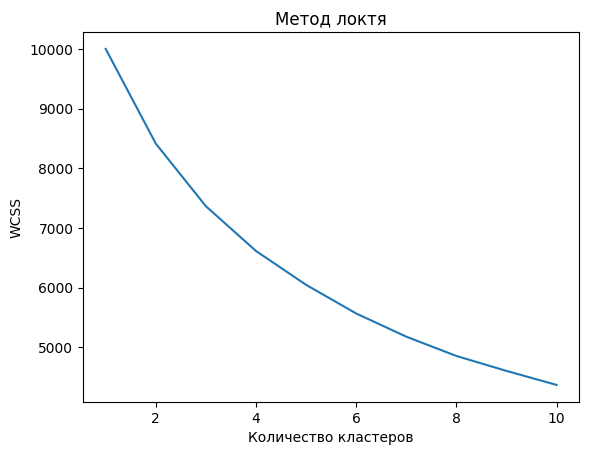

In [52]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

## Обучаем модель кластеризации

In [53]:
# создадим экземпляр модели
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# обучаем модель на стандартизированных данных
kmeans.fit(X_scaled)


KMeans(n_clusters=5, random_state=42)

## Предсказываем кластеры и визуализируем результаты

In [54]:
# предсказываем кластеры для каждого
clusters = kmeans.predict(X_scaled)
# добавляем метки кластеров в исходные данные
df_copy['cluster'] = clusters
df_copy.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown,cluster
0,19,15000,39,1,4,1,0,0,0,0,1,0,0,0,0,2
1,21,35000,81,3,3,1,0,1,0,0,0,0,0,0,0,3
2,20,86000,6,1,1,0,0,1,0,0,0,0,0,0,0,2
3,23,59000,77,0,2,0,0,0,0,0,0,0,1,0,0,3
4,31,38000,40,2,6,0,0,0,1,0,0,0,0,0,0,1


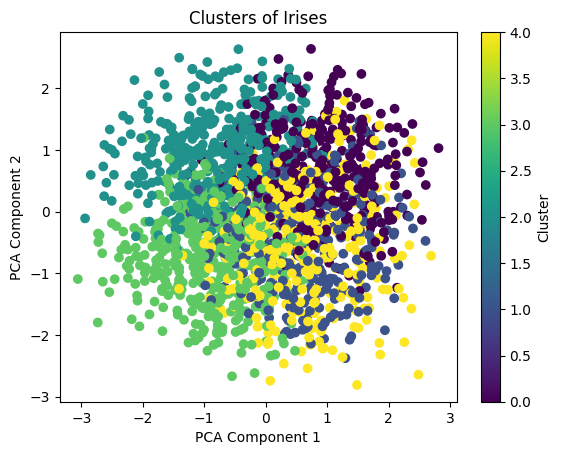

In [55]:
from sklearn.decomposition import PCA

# Уменьшаем размерность до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Irises')
plt.colorbar(label='Cluster')
plt.show()

In [57]:
# Группируем по кластерам
cluster_groups = df_copy.groupby('cluster')
# Анализ средних значений в каждом кластере
cluster_groups.mean()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
cluster,,,,,,,,,,,,,,,
0,77.772021,118707.772021,55.282383,4.056995,5.683938,0.406736,0.075130,0.108808,0.137306,0.075130,0.150259,0.031088,0.069948,0.028497,0.036269
1,23.207283,131385.333333,43.476190,3.235294,5.669468,0.375350,0.072829,0.086835,0.120448,0.084034,0.198880,0.030812,0.081232,0.042017,0.011204
2,57.164706,82542.743529,25.251765,2.522353,2.611765,0.392941,0.080000,0.096471,0.115294,0.063529,0.167059,0.018824,0.082353,0.049412,0.009412
3,40.356195,98593.161504,77.694690,1.911504,2.559735,0.402655,0.075221,0.075221,0.117257,0.077434,0.179204,0.019912,0.055310,0.042035,0.011062
4,44.944737,129192.378947,50.565789,9.336842,2.768421,0.457895,0.100000,0.081579,0.094737,0.084211,0.152632,0.052632,0.068421,0.050000,0.021053


## Визуализация по нескольким парам разных признаков с указанием центроидов

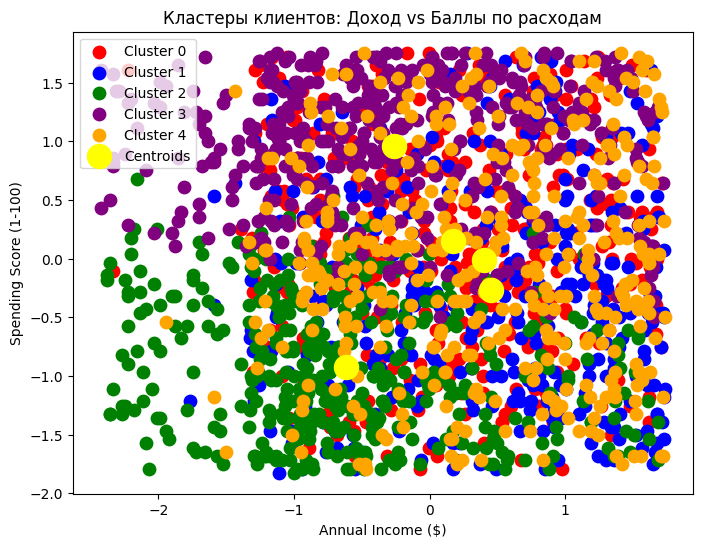

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[clusters == 0, 1], X_scaled[clusters == 0, 2], s=80, c='red', label='Cluster 0')
plt.scatter(X_scaled[clusters == 1, 1], X_scaled[clusters == 1, 2], s=80, c='blue', label='Cluster 1')
plt.scatter(X_scaled[clusters == 2, 1], X_scaled[clusters == 2, 2], s=80, c='green', label='Cluster 2')
plt.scatter(X_scaled[clusters == 3, 1], X_scaled[clusters == 3, 2], s=80, c='purple', label='Cluster 3')
plt.scatter(X_scaled[clusters == 4, 1], X_scaled[clusters == 4, 2], s=80, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
plt.title('Кластеры клиентов: Доход vs Баллы по расходам')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

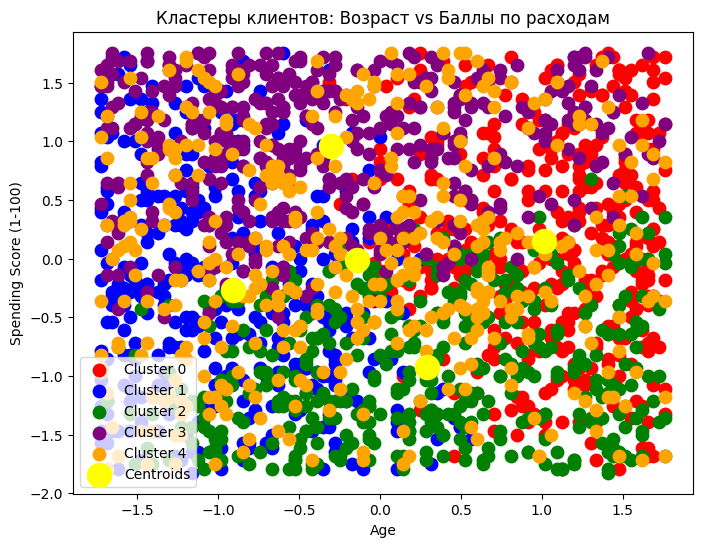

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 2], s=80, c='red', label='Cluster 0')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 2], s=80, c='blue', label='Cluster 1')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 2], s=80, c='green', label='Cluster 2')
plt.scatter(X_scaled[clusters == 3, 0], X_scaled[clusters == 3, 2], s=80, c='purple', label='Cluster 3')
plt.scatter(X_scaled[clusters == 4, 0], X_scaled[clusters == 4, 2], s=80, c='orange', label='Cluster 4')

# Центроиды
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')

plt.title('Кластеры клиентов: Возраст vs Баллы по расходам')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [62]:
df_copy['Cluster'] = clusters
df_copy.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown,cluster,Cluster
0,19,15000,39,1,4,1,0,0,0,0,1,0,0,0,0,2,2
1,21,35000,81,3,3,1,0,1,0,0,0,0,0,0,0,3,3
2,20,86000,6,1,1,0,0,1,0,0,0,0,0,0,0,2,2
3,23,59000,77,0,2,0,0,0,0,0,0,0,1,0,0,3,3
4,31,38000,40,2,6,0,0,0,1,0,0,0,0,0,0,1,1
